In [33]:
import sys
sys.path.append('../../../')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
import glob
from src.utilities import load_serialized_object, root_path

results_root = root_path('src', 'transfer_learning', 'models', 'result')
def load_globbed_results(regexps):
    print('Loading results from ' + str(regexps))
    paths = []
    for regexp in regexps:
        regexp_path = results_root + '/' + regexp
        paths.extend(glob.glob(regexp_path))
    print('....loaded %s result' % len(paths))
    return paths

# Netbase - 1 model
netbase_result = load_globbed_results(['netbase'])

# Half Rand Base - 6 models
half_rand_results = load_globbed_results(['half_rand*'])
# Half Animal Transportation - 2 models
half_anitrans_results = load_globbed_results(['half_anitrans*'])

# Selffer, not finetuned 36 models
selffer_results = load_globbed_results(['selffer_?A?A*', 'selffer_?B?B*'])
# Selffer, finetuned 36 models
selffer_ft_results = load_globbed_results(['selffer_ft_*'])

# Transfer A->B, B->A, not finetuned, 36 models
transfer_results = load_globbed_results(['transfer_?A?B*', 'transfer_?B?A*'])
# Transfer A->B, B->A, finetuned, 36 models
transfer_ft_results = load_globbed_results(['transfer_ft_?A?B*', 'transfer_ft_?B?A*'])

# Transfer Animal Transportation - 12 models, not finetuned
transfer_anitrans_results = load_globbed_results(['transfer_anitrans*'])
# Transfer Animal Transportation - 12 models, finetuned
transfer_ft_anitrans_results = load_globbed_results(['transfer_ft_anitrans*'])

Using TensorFlow backend.


Loading results from ['netbase']
....loaded 1 result
Loading results from ['half_rand*']
....loaded 6 result
Loading results from ['half_anitrans*']
....loaded 2 result
Loading results from ['selffer_?A?A*', 'selffer_?B?B*']
....loaded 36 result
Loading results from ['selffer_ft_*']
....loaded 36 result
Loading results from ['transfer_?A?B*', 'transfer_?B?A*']
....loaded 36 result
Loading results from ['transfer_ft_?A?B*', 'transfer_ft_?B?A*']
....loaded 36 result
Loading results from ['transfer_anitrans*']
....loaded 12 result
Loading results from ['transfer_ft_anitrans*']
....loaded 12 result


# TRAINING TIME

In [3]:
def get_training_time(result_dirs):
    time_file = 'time.pkl'
    time_dict = {}
    for result in result_dirs:
        model_name = os.path.basename(result)
        time = load_serialized_object(os.path.join(result, time_file))
        time_dict[model_name] = '{}:{}'.format(*divmod(time, 60))
    return time_dict

# Netbase
time_dict_netbase = get_training_time(netbase_result)
# Half rand
time_dict_half_rand = get_training_time(half_rand_results)
# Half anitrans
time_dict_half_anitrans = get_training_time(half_anitrans_results)

# Selffer, not finetuned 36 models
time_dict_selffer_results = get_training_time(selffer_results)
# Selffer, finetuned 36 models
time_dict_selffer_ft_results = get_training_time(selffer_ft_results)

# Transfer A->B, B->A, not finetuned, 36 models
time_dict_transfer_results = get_training_time(transfer_results)
# Transfer A->B, B->A, finetuned, 36 models
time_dict_transfer_ft_results = get_training_time(transfer_ft_results)

# Transfer Animal Transportation - 12 models, not finetuned
time_dict_transfer_anitrans_results = get_training_time(transfer_anitrans_results)
# Transfer Animal Transportation - 12 models, finetuned
time_dict_transfer_ft_anitrans_results = get_training_time(transfer_ft_anitrans_results)

In [4]:
pd.DataFrame([time_dict_netbase])

,netbase
0,15:36


In [5]:
pd.DataFrame([time_dict_half_rand])

,half_rand0A,half_rand0B,half_rand1A,half_rand1B,half_rand2A,half_rand2B
0,7:47,7:53,7:53,7:50,7:55,7:53


In [6]:
pd.DataFrame([time_dict_half_anitrans])

,half_anitransA,half_anitransB
0,9:33,6:21


In [7]:
pd.DataFrame([time_dict_selffer_results])

,selffer_0A0A_1,selffer_0A0A_2,selffer_0A0A_3,selffer_0A0A_4,selffer_0A0A_5,selffer_0A0A_6,selffer_0B0B_1,selffer_0B0B_2,selffer_0B0B_3,selffer_0B0B_4,...,selffer_2A2A_3,selffer_2A2A_4,selffer_2A2A_5,selffer_2A2A_6,selffer_2B2B_1,selffer_2B2B_2,selffer_2B2B_3,selffer_2B2B_4,selffer_2B2B_5,selffer_2B2B_6
0,6:39,5:11,4:22,3:49,3:23,3:10,6:52,5:26,4:37,4:1,...,4:54,4:23,3:57,3:46,7:28,6:0,5:13,4:36,4:11,3:59


In [8]:
pd.DataFrame([time_dict_selffer_ft_results])

,selffer_ft_0A0A_1,selffer_ft_0A0A_2,selffer_ft_0A0A_3,selffer_ft_0A0A_4,selffer_ft_0A0A_5,selffer_ft_0A0A_6,selffer_ft_0B0B_1,selffer_ft_0B0B_2,selffer_ft_0B0B_3,selffer_ft_0B0B_4,...,selffer_ft_2A2A_3,selffer_ft_2A2A_4,selffer_ft_2A2A_5,selffer_ft_2A2A_6,selffer_ft_2B2B_1,selffer_ft_2B2B_2,selffer_ft_2B2B_3,selffer_ft_2B2B_4,selffer_ft_2B2B_5,selffer_ft_2B2B_6
0,7:47,7:49,7:52,8:1,8:6,8:3,8:2,8:4,8:7,8:10,...,8:26,8:36,8:43,8:38,8:36,8:39,8:43,8:46,8:49,8:53


In [9]:
pd.DataFrame([time_dict_transfer_results])

,transfer_0A0B_1,transfer_0A0B_2,transfer_0A0B_3,transfer_0A0B_4,transfer_0A0B_5,transfer_0A0B_6,transfer_0B0A_1,transfer_0B0A_2,transfer_0B0A_3,transfer_0B0A_4,...,transfer_2A2B_3,transfer_2A2B_4,transfer_2A2B_5,transfer_2A2B_6,transfer_2B2A_1,transfer_2B2A_2,transfer_2B2A_3,transfer_2B2A_4,transfer_2B2A_5,transfer_2B2A_6
0,7:58,6:31,5:41,5:7,4:41,4:33,7:42,6:15,5:26,4:51,...,6:44,6:8,5:50,5:38,8:45,7:16,6:28,5:56,5:31,5:24


In [10]:
pd.DataFrame([time_dict_transfer_ft_results])

,transfer_ft_0A0B_1,transfer_ft_0A0B_2,transfer_ft_0A0B_3,transfer_ft_0A0B_4,transfer_ft_0A0B_5,transfer_ft_0A0B_6,transfer_ft_0B0A_1,transfer_ft_0B0A_2,transfer_ft_0B0A_3,transfer_ft_0B0A_4,...,transfer_ft_2A2B_3,transfer_ft_2A2B_4,transfer_ft_2A2B_5,transfer_ft_2A2B_6,transfer_ft_2B2A_1,transfer_ft_2B2A_2,transfer_ft_2B2A_3,transfer_ft_2B2A_4,transfer_ft_2B2A_5,transfer_ft_2B2A_6
0,9:8,9:10,9:15,9:19,9:23,9:26,8:51,8:56,9:0,9:1,...,10:20,10:23,10:29,10:34,9:52,9:57,9:59,10:6,10:11,10:15


In [11]:
pd.DataFrame([time_dict_transfer_anitrans_results])

,transfer_anitrans_AB_1,transfer_anitrans_AB_2,transfer_anitrans_AB_3,transfer_anitrans_AB_4,transfer_anitrans_AB_5,transfer_anitrans_AB_6,transfer_anitrans_BA_1,transfer_anitrans_BA_2,transfer_anitrans_BA_3,transfer_anitrans_BA_4,transfer_anitrans_BA_5,transfer_anitrans_BA_6
0,8:0,6:59,6:19,5:53,5:32,5:30,10:41,8:54,8:0,7:14,6:50,6:34


In [12]:
pd.DataFrame([time_dict_transfer_ft_anitrans_results])

,transfer_ft_anitrans_AB_1,transfer_ft_anitrans_AB_2,transfer_ft_anitrans_AB_3,transfer_ft_anitrans_AB_4,transfer_ft_anitrans_AB_5,transfer_ft_anitrans_AB_6,transfer_ft_anitrans_BA_1,transfer_ft_anitrans_BA_2,transfer_ft_anitrans_BA_3,transfer_ft_anitrans_BA_4,transfer_ft_anitrans_BA_5,transfer_ft_anitrans_BA_6
0,9:0,9:3,9:11,9:18,9:23,9:27,12:1,12:5,12:11,12:21,12:24,12:30


# TRAINING RESULT

In [59]:
def get_accuracy(result_dirs, method='mean_best', n=10, group_by_layer=False):
    hist_file = 'hist.pkl'
    accuracy = {}
    
    for result in result_dirs:
        model_name = os.path.basename(result)
        hist = load_serialized_object(os.path.join(result, hist_file))
        if method == 'mean_best':
         acc = np.mean(sorted(hist['val_acc'])[-n:])
        elif method == 'last':
         acc = hist['val_acc'][-1]
        else:
            raise ValueError('Method available: mean_best, last')
        
        if group_by_layer:
            layer = int(model_name[-1])
            model_name = model_name[0:-2]
            if model_name not in accuracy:
                accuracy[model_name] = [None] * 6
            accuracy[model_name][layer-1] = acc
        else:
            accuracy[model_name] = acc
    
        
    return accuracy
    
n_best = 10
print(get_accuracy(netbase_result, method='last'))
print(get_accuracy(netbase_result, method='mean_best', n=n_best))
print(get_accuracy(half_rand_results, method='last'))
print(get_accuracy(half_rand_results, method='mean_best', n=n_best))
print(get_accuracy(half_anitrans_results, method='last'))
print(get_accuracy(half_anitrans_results, method='mean_best', n=n_best))

print('Selffer')
print(get_accuracy(selffer_results, method='mean_best', n=n_best, group_by_layer=True))
print('Selffer FT')
print(get_accuracy(selffer_ft_results, method='mean_best', n=n_best, group_by_layer=True))

{'netbase': 0.81179999999999997}
{'netbase': 0.82922999999999991}
{'half_rand2B': 0.85680000038146975, 'half_rand0B': 0.89760000076293944, 'half_rand1A': 0.86820000066757197, 'half_rand0A': 0.9040000001907349, 'half_rand1B': 0.90660000076293945, 'half_rand2A': 0.88979999942779542}
{'half_rand2B': 0.85948000032424932, 'half_rand0B': 0.90340000006675714, 'half_rand1A': 0.86445999995231626, 'half_rand0A': 0.90695999979972852, 'half_rand1B': 0.90896000018119805, 'half_rand2A': 0.89728000008583064}
{'half_anitransA': 0.80516666650772095, 'half_anitransB': 0.9129999995231628}
{'half_anitransA': 0.80679999987284357, 'half_anitransB': 0.92170000004768371}
Selffer
{'selffer_1A1A': [0.85901999985694888, 0.87050000026702867, 0.86994000017166129, 0.87008000010490405, 0.8726200001716613, 0.87251999966621396], 'selffer_0B0B': [0.90573999979019182, 0.90986000000953671, 0.90719999956130981, 0.90848000000953666, 0.90857999998092642, 0.90595999988555909], 'selffer_2B2B': [0.85941999973297123, 0.86718000

## Netbase

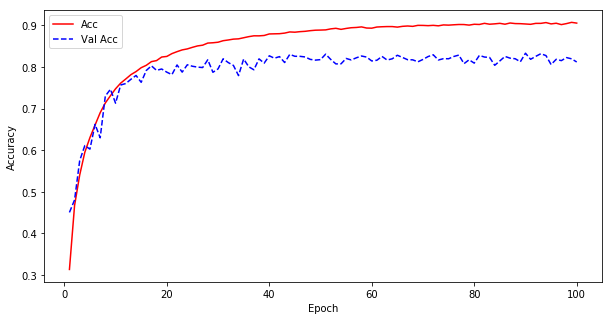

In [48]:
hist_file = root_path('src', 'transfer_learning', 'models', 'result', 'netbase', 'hist.pkl')
hist = load_serialized_object(hist_file)

%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]
plt.plot(range(1, 1+len(hist['acc'])), hist['acc'], label='Acc', color='r')
plt.plot(range(1, 1+len(hist['val_acc'])), hist['val_acc'], label='Val Acc', linestyle='--', color='b')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

{'selffer_1A1A': [0.85901999985694888, 0.87050000026702867, 0.86994000017166129, 0.87008000010490405, 0.8726200001716613, 0.87251999966621396], 'selffer_0B0B': [0.90573999979019182, 0.90986000000953671, 0.90719999956130981, 0.90848000000953666, 0.90857999998092642, 0.90595999988555909], 'selffer_2B2B': [0.85941999973297123, 0.86718000005722051, 0.8689200004196167, 0.86688000014305122, 0.86584000045776366, 0.86372000064849852], 'selffer_1B1B': [0.90558000006675721, 0.91522000026702899, 0.91668000021934515, 0.91358000020980834, 0.91738000028610234, 0.91344000051498431], 'selffer_0A0A': [0.9050800004482269, 0.91021999994277958, 0.91067999958991996, 0.91385999970436083, 0.91109999977111822, 0.90852000035285951], 'selffer_2A2A': [0.90377999979972823, 0.90422000031471261, 0.9055400002002717, 0.90923999993324289, 0.90477999980926516, 0.90191999996185301]}


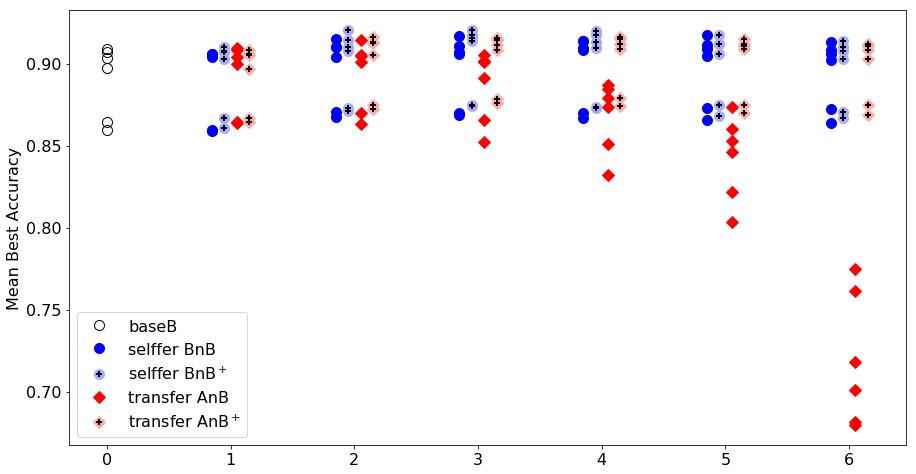

In [164]:
n_best = 10
netbase_acc = get_accuracy(netbase_result, method='mean_best', n=n_best)
half_rand_acc = get_accuracy(half_rand_results, method='mean_best', n=n_best)
selffer_acc = get_accuracy(selffer_results, method='mean_best', n=n_best, group_by_layer=True)
selffer_ft_acc = get_accuracy(selffer_ft_results, method='mean_best', n=n_best, group_by_layer=True)
transfer_acc = get_accuracy(transfer_results, method='mean_best', n=n_best, group_by_layer=True)
transfer_ft_acc = get_accuracy(transfer_ft_results, method='mean_best', n=n_best, group_by_layer=True)
print(selffer_acc)

%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams.update({'font.size': 16})
msize = 10
msized = 8
msizep = 6

hh = {}

# Plot the 6 half base
hh['k'] ,= plt.plot([0]*6, half_rand_acc.values(), 'ko', markersize=msize, fillstyle='none')

# Plot the selffer for each layer
for layer in range(1,7):
    vals = []
    for key in selffer_acc:
        vals.append(selffer_acc[key][layer-1])
    hh['b'],=plt.plot(np.array([layer]*6)-0.15, vals, 'bo', markersize=msize)

# Plot selffer finetuned
for layer in range(1,7):
    vals = []
    for key in selffer_ft_acc:
        vals.append(selffer_ft_acc[key][layer-1])
    hh['bft1'],=plt.plot(np.array([layer]*6)-0.05, vals, 'o', color='#aaaaff', markersize=msize)
    hh['bft2'],=plt.plot(np.array([layer]*6)-0.05, vals, '+', color = 'k', mew=2, markersize=msizep)

# Plot the transfer for each layer
for layer in range(1,7):
    vals = []
    for key in transfer_acc:
        vals.append(transfer_acc[key][layer-1])
    hh['r'],=plt.plot(np.array([layer]*6)+0.05, vals, 'D', color = 'r', markersize=msized)
    
# Plot the transfer finetuned 
for layer in range(1,7):
    vals = []
    for key in transfer_ft_acc:
        vals.append(transfer_ft_acc[key][layer-1])
    hh['rft1'],=plt.plot(np.array([layer]*6)+0.15, vals, 'D', color = '#ffaaaa', markersize=msized)
    hh['rft2'],=plt.plot(np.array([layer]*6)+0.15, vals, '+', color = 'k', mew=2, markersize=msizep)
    
plt.ylabel('Mean Best Accuracy')
plt.legend([hh['k'], hh['b'], (hh['bft1'],hh['bft2']), hh['r'], (hh['rft1'],hh['rft2'])],
       ['baseB', 'selffer BnB', 'selffer BnB$^+$', 'transfer AnB', 'transfer AnB$^+$'],
       loc='lower left', numpoints=1)
plt.show()

{'half_anitransA': 0.80679999987284357, 'half_anitransB': 0.92170000004768371}
{'transfer_anitrans_AB': [0.92057499947547916, 0.91952499995231618, 0.91624999976158139, 0.89559999957084657, 0.87824999999999986, 0.69807500004768364], 'transfer_anitrans_BA': [0.803249999856949, 0.78864999998410545, 0.77356666661898299, 0.73441666674613959, 0.68943333346048996, 0.52010000014305124]}
{'transfer_ft_anitrans_BA': [0.80606666669845572, 0.81420000001589465, 0.81376666658719388, 0.80961666668256116, 0.8092500000794729, 0.80591666661898298], 'transfer_ft_anitrans_AB': [0.91822500042915356, 0.92357500023841843, 0.92570000038146971, 0.92745000019073487, 0.9258499999523162, 0.92654999985694886]}


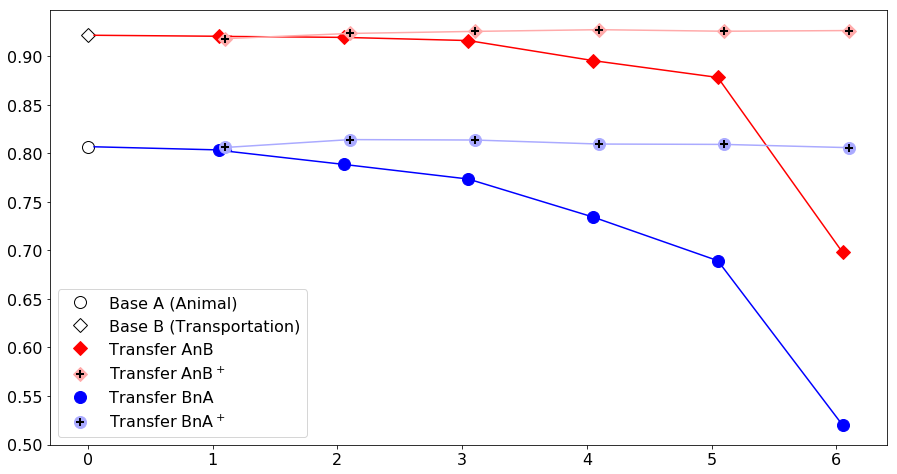

In [220]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams.update({'font.size': 16})
msize = 12
msized = 10
msizep = 8

n_best = 10
half_anitrans_acc = get_accuracy(half_anitrans_results, method='mean_best', n=n_best)
print(half_anitrans_acc)
transfer_anitrans_acc= get_accuracy(transfer_anitrans_results, method='mean_best', n=n_best, group_by_layer=True)
print(transfer_anitrans_acc)
transfer_ft_anitrans_acc= get_accuracy(transfer_ft_anitrans_results, method='mean_best', n=n_best, group_by_layer=True)
print(transfer_ft_anitrans_acc)

hh = {}

# Plot the base animal and transportation
hh['base_a'] ,= plt.plot(0, half_anitrans_acc['half_anitransA'], 'ko', markersize=msize, fillstyle='none')
hh['base_b'] ,=plt.plot(0, half_anitrans_acc['half_anitransB'], 'kD', markersize=msized, fillstyle='none')

plt.plot([0.05, 1.15], [half_anitrans_acc['half_anitransA'],transfer_anitrans_acc['transfer_anitrans_BA'][0]], '-', color='b')
plt.plot([0.05, 1.15], [half_anitrans_acc['half_anitransB'],transfer_anitrans_acc['transfer_anitrans_AB'][0]], '-', color='r')


# Plot the transfer anitrans AB
hh['tf_ab'] ,= plt.plot(np.array(list(range(1,7)))+0.05, transfer_anitrans_acc['transfer_anitrans_AB'], 'D', color = 'r', markersize=msized)
plt.plot(np.array(list(range(1,7)))+0.05, transfer_anitrans_acc['transfer_anitrans_AB'], '-', color = 'r', markersize=msized)
# Plot the transfer anitrans AB, finetuned
hh['tf_ab_ft1'] ,=plt.plot(np.array(list(range(1,7)))+0.1, transfer_ft_anitrans_acc['transfer_ft_anitrans_AB'], 'D', color = '#ffaaaa', markersize=msized)
plt.plot(np.array(list(range(1,7)))+0.1, transfer_ft_anitrans_acc['transfer_ft_anitrans_AB'], '-', color = '#ffaaaa', markersize=msized)
hh['tf_ab_ft2'] ,=plt.plot(np.array(list(range(1,7)))+0.1, transfer_ft_anitrans_acc['transfer_ft_anitrans_AB'], '+', color = 'k', mew=2, markersize=msizep)

# Plot the transfer anitrans BA
hh['tf_ba'] ,= plt.plot(np.array(list(range(1,7)))+0.05, transfer_anitrans_acc['transfer_anitrans_BA'], 'o', color = 'b', markersize=msize)
plt.plot(np.array(list(range(1,7)))+0.05, transfer_anitrans_acc['transfer_anitrans_BA'], '-', color = 'b', markersize=msize)
# Plot the transfer anitrans BA, finetuned
hh['tf_ba_ft1'] ,= plt.plot(np.array(list(range(1,7)))+0.1, transfer_ft_anitrans_acc['transfer_ft_anitrans_BA'], 'o', color = '#aaaaff', markersize=msize)
plt.plot(np.array(list(range(1,7)))+0.1, transfer_ft_anitrans_acc['transfer_ft_anitrans_BA'], '-', color = '#aaaaff', markersize=msize)
hh['tf_ba_ft2'] ,= plt.plot(np.array(list(range(1,7)))+0.1, transfer_ft_anitrans_acc['transfer_ft_anitrans_BA'], '+', color = 'k', mew=2, markersize=msizep)

plt.legend([hh['base_a'], hh['base_b'], hh['tf_ab'], (hh['tf_ab_ft1'],hh['tf_ab_ft2']), hh['tf_ba'], (hh['tf_ba_ft1'],hh['tf_ba_ft2'])],
       ['Base A (Animal)', 'Base B (Transportation)', 'Transfer AnB', 'Transfer AnB$^+$', 'Transfer BnA', 'Transfer BnA$^+$'],
       loc='lower left', numpoints=1)

plt.show()